<a href="https://colab.research.google.com/github/suryapratapkhuntia/Machine-Learning-End_to_end_project/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x=np.random.rand(100,1) - 0.5
y=3*x[:,0]**2 + 0.02*np.random.randn(100)

In [3]:
import pandas as pd

In [4]:
df=pd.DataFrame(x,columns=['x'])
df['y']=y

In [5]:
df

,x,y
0,-0.125460,0.048961
1,0.450714,0.603450
2,0.231994,0.163299
3,0.098658,-0.010551
4,-0.343981,0.350576
...,...,...
95,-0.006204,-0.016201
96,0.022733,0.000008
97,-0.072459,0.022574
98,-0.474581,0.681215


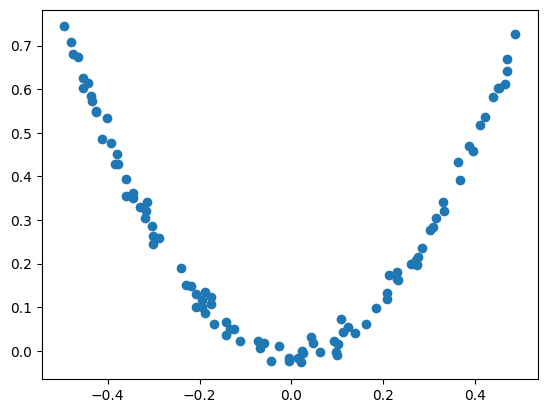

In [6]:
plt.scatter(df['x'],df['y'])

In [7]:
df['pred1']=df['y'].mean()
df

,x,y,pred1
0,-0.125460,0.048961,0.265491
1,0.450714,0.603450,0.265491
2,0.231994,0.163299,0.265491
3,0.098658,-0.010551,0.265491
4,-0.343981,0.350576,0.265491
...,...,...,...
95,-0.006204,-0.016201,0.265491
96,0.022733,0.000008,0.265491
97,-0.072459,0.022574,0.265491
98,-0.474581,0.681215,0.265491


In [8]:
df['res1']=df['y']-df['pred1']
df

,x,y,pred1,res1
0,-0.125460,0.048961,0.265491,-0.216529
1,0.450714,0.603450,0.265491,0.337959
2,0.231994,0.163299,0.265491,-0.102192
3,0.098658,-0.010551,0.265491,-0.276042
4,-0.343981,0.350576,0.265491,0.085085
...,...,...,...,...
95,-0.006204,-0.016201,0.265491,-0.281692
96,0.022733,0.000008,0.265491,-0.265482
97,-0.072459,0.022574,0.265491,-0.242917
98,-0.474581,0.681215,0.265491,0.415724


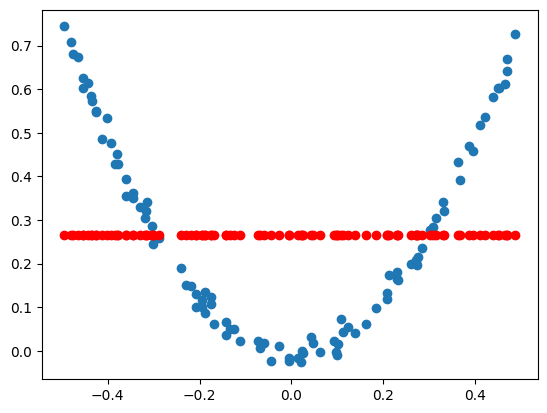

In [9]:
plt.scatter(df['x'],df['y'])
plt.scatter(df['x'],df['pred1'],color='red')

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [12]:
tree1.fit(df['x'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [13]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)


5


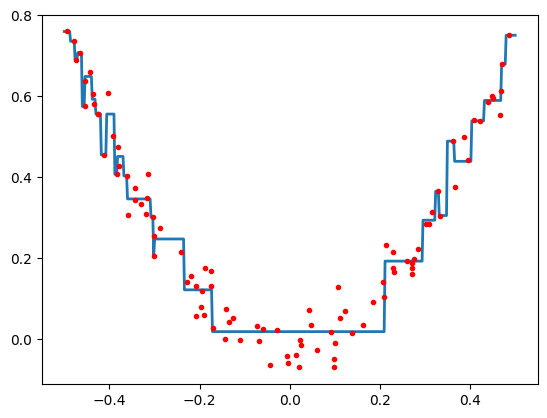

4


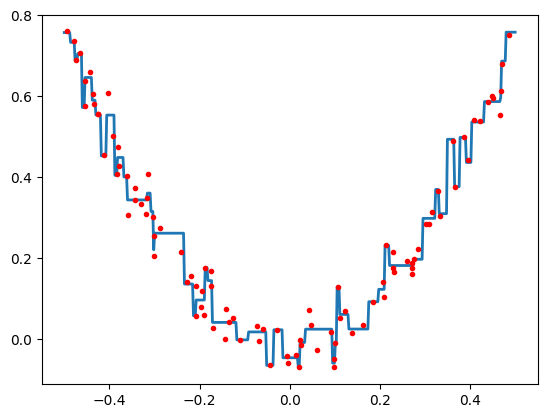

3


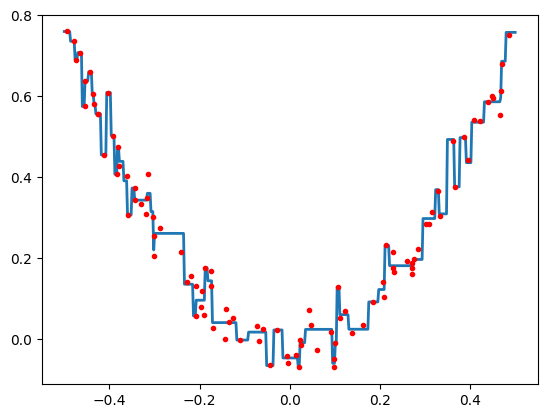

2


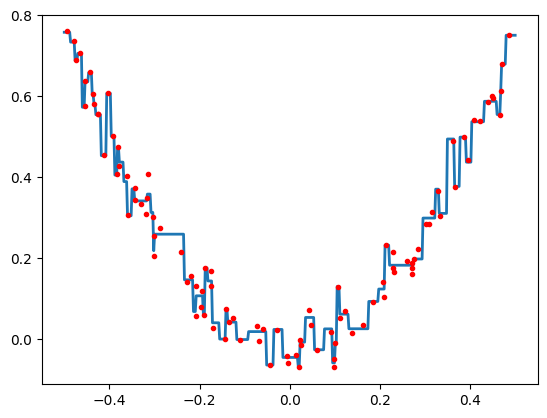

1


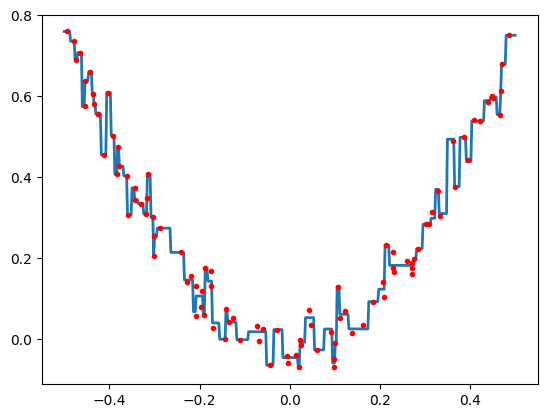

In [14]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)